#Notatki

Korelacja liniowa zachodzi wtedy gdy jedna zmienna jest proporcjonalnie większa lub mniejsza od drugiej

W sytuacji gdy wartości danej zmiennej nie ma na wykrysie, to możemy zakładać, że jest wartość y wynosi tyle ile będzie wynikało z pozycji na linii

Nie powinno się stosować regresji liniowej gdy wartość danej zmiennej znajduje się poza wykresem, np gdy najnizsza wartosc na wykresie to x=3, a chcemy znaleźć wartość dla x=2

m = [1.93939394]
b = [4.73333333]


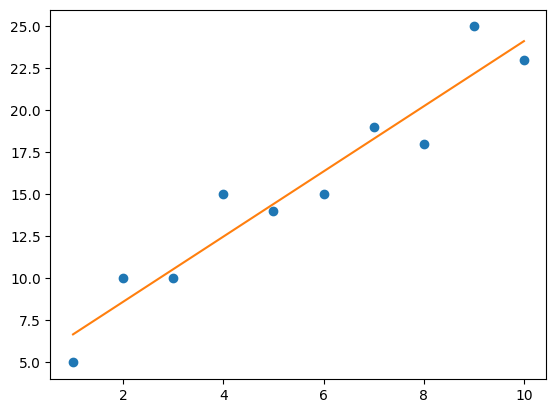

In [ ]:
#Podstawowa regresja liniowa przy użyciu scikit-learn(str. 134-135)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1]

Y = df.values[:, -1]

dopasowanie = LinearRegression().fit(X, Y)

m = dopasowanie.coef_.flatten()
b = dopasowanie.intercept_.flatten()
print('m = {0}'.format(m))
print('b = {0}'.format(b))

plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

Jakość położenia linii przebiegającei przez wykres jest dopasowywana na podstawie reszt

In [ ]:
#Obliczanie reszt dla określonej linii i danych
import pandas as pd

points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

m = 1.93939
b = 4.73333

#obliczanie reszty
for p in points:
  y_rzeczywista = p.y
  y_przewidywana = m*p.x + b
  reszta = y_rzeczywista - y_przewidywana
  print(reszta)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


Powyżej są ukazane różnice pozycji spodziewanej od pozycji rzeczywistej

In [ ]:
#Obliczanie sumy kwadratów dla określonej linii i danych
import pandas as pd

points = pd.read_csv('https://bit.ly/2KF29Bd').itertuples()

m = 1.93939
b = 4.73333

suma_kwadratow = 0.0

for p in points:
  y_rzeczywista = p.y
  y_przewidywana = m*p.x + b
  reszta_do_kwadratu = (y_rzeczywista - y_przewidywana)**2
  suma_kwadratow += reszta_do_kwadratu

print('Suma kwadratów = {}'.format(suma_kwadratow))

Suma kwadratów = 28.096969704500005


Znajdowanie najlepiej dopasowanej linii przekłada się na najmniejszą wartość funkcji straty

In [ ]:
#Obliczanie współczynników m i b w prostej regresji liniowej
import pandas as pd

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(punkty)

m = (
    n*sum(p.x*p.y for p in punkty) - sum(p.x for p in punkty) * sum(p.y for p in punkty)
    ) / (n*sum(p.x**2 for p in punkty) - sum(p.x for p in punkty)**2)

b = (sum(p.y for p in punkty) / n) - m * sum(p.x for p in punkty) / n

print(m, b)

1.9393939393939394 4.7333333333333325


Powyższy kod stosuje poniższe wzory na obliczenie współczynników m oraz b

Do przeprowadzania regresji liniowej używa się macierzy transponowanych oraz odwrotnych.
Wzór którego używa się do tego wygląda następująco:

## $b = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y$

In [ ]:
#Inwersja liniowa przy użyciu macierzy odwrotnych i transponowanych
import pandas as pd
from numpy.linalg import inv
import numpy as np

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1].flatten()

X_1 = np.vstack([X, np.ones(len(X))]).T

Y = df.values[:, -1]

b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

y_przewidywana = X_1.dot(b)

[1.93939394 4.73333333]


## Regresja liniowa przy użyciu rozkładu QR

In [ ]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

#importowanie punktów
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

#Wyodrębnienie zmiennych wyjściowych
X = df.values[:, :-1].flatten()

#Dodanie kolumny wartości 1, aby powstał wyraz wolny
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

#Kolumna wyjściowa
Y = df.values[:, -1]

#Obliczanie nachylenia i wyrazu wolnego za pomocą rozkładu QR
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)
print(b)

[1.93939394 4.73333333]


##**Gradienty proste**

In [ ]:
#znajdowanie minimum paraboli za pomocą gradientu prostego
import random

def f(x):
  return (x - 3) ** 2 + 4

def dx_f(x):
  return 2*(x - 3)

#tempo nauki
L = 0.001

iteracje = 100_000

#losowa wartość
x = random.randint(-15, 15)

for i in range(iteracje):
  #nachylenie
  d_x = dx_f(x)

  #aktualizacja zmiennej x poprzez odejmowanie wartości iloczynu: (tempo nauku) * (nachylenie)
  x -= L * d_x

print(x, f(x))

2.999999999999889 4.0


In [ ]:
#regresja liniowa metodą gradientu prostego
import pandas as pd

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())

m = 0.0
b = 0.0

L = 0.001

iteracje = 100_000

n = float(len(punkty))

#gradient prosty
for i in range(iteracje):
  #nachylenie względem m
  D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in punkty)

  #Nachylenie względem b
  D_b = sum(2 * ((m * p.x + b) - p.y) for p in punkty)

  #aktualizacja wartości m oraz b
  m -= L * D_m
  b -= L * D_b

print('y = {0}x + {1}'.format(m, b))

y = 1.9393939393939548x + 4.733333333333227


In [ ]:
#Obliczanie pochodnych cząstkowych względem m oraz b za pomocą SymPy
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

suma_kwadratow = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(suma_kwadratow, m)
d_b = diff(suma_kwadratow, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


Funkcja sumy kwadratów:
### $e(x) = \sum_{i=0}^{n} ((mx_i + b) - y_i)^{2}$

Notacja matematyczna powyższych pochodnych:
### $\frac{d}{dm}e(x) = \sum_{i=0}^{n} 2(b + mx_i - y_i)x_i$
### $\frac{d}{db}e(x) = \sum_{i=0}^{n} (2b + 2mx_i - 2y_i)$


In [ ]:
#Rozwiązywanie regresji liniowej przy użyciu SymPy
import pandas as pd
from sympy import *

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

suma_kwadratow = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(suma_kwadratow, m).subs(n, len(punkty) - 1).doit().replace(x, lambda i: punkty[i].x).replace(y, lambda i: punkty[i].y)

d_b = diff(suma_kwadratow, b).subs(n, len(punkty) - 1).doit().replace(x, lambda i: punkty[i].x).replace(y, lambda i: punkty[i].y)

#Kompilacja za pomocą lambdify w celu przyśpieszenia obliczeń
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

#Budujemy model
m = 0.0
b = 0.0

#Tempo nauki
L = 0.001

iteracje = 100_000

#Gradient prosty
for i in range(iteracje):

  #Aktualizzacja m i b
  m -= d_m(m, b) * L
  b -= d_b(m, b) * L

print(f'y = {m}x + {b}')

y = 1.939393939393954x + 4.733333333333231


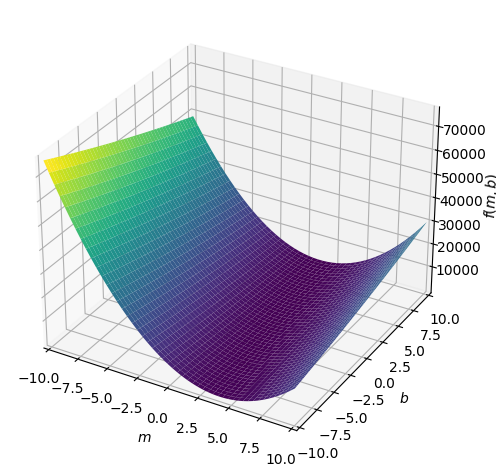

In [ ]:
#Obliczanie funkcji straty
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

suma_kwadratow = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)).subs(n, len(punkty) - 1).doit().replace(x, lambda i: punkty[i].x).replace(y, lambda i: punkty[i].y)

plot3d(suma_kwadratow)

Zaletą regresji liniowej jest to że podczas przewidywania wyniku to mimo nie 100%-wej predykcji wartości zmiennej, to i tak jej wariancja nie będzie nadwyraz duża

Najczęściej w uczeniu maszynowym korzysta się z metody stochatycznego gradientu prostego który polega na dzieleniu danych na mniejsze próbki na których model uczy się oddzielnie, dzięki czemu minimalizujemy nadmierne dopasowanie się modelu do danych

In [ ]:
#regresja liniowa z wykorzystaniem metody stochatycznego gradientu prostego
import pandas as pd
import numpy as np

dane = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
X = dane.iloc[:, 0].values
Y = dane.iloc[:, 1].values

n = dane.shape[0]

m = 0.0
b = 0.0
rozmiar_proby = 1
L = 0.0001
epoki = 1_000_000

for i in range(epoki):
  idx = np.random.choice(n, rozmiar_proby, replace=False)
  x_proba = X[idx]
  y_proba = Y[idx]

  #Bieżaca przewidywana wartość Y
  Y_pred = m * x_proba + b

  #Pochoda d od m
  D_m = (-2 / rozmiar_proby) * sum(x_proba * (y_proba - Y_pred))

  #Pochoda d od b
  D_b = (-2 / rozmiar_proby) * sum(y_proba - Y_pred)
  m = m - L * D_m
  b = b - L * D_b

  if i % 10000 == 0:
    print(i, m, b)

print(f'y = {m}x + {b}')

Dzięki losowemu pomieszaniu danych wartość funkcji straty nie będzie taka sama za każdym razem, lecz jej wartości będą podobne

##**Korelacja liniowa**

Korelacja liniowa jest to współczynnik wynoszący od -1 do 1.

Współczynnik bliski -1 oznacza że występuje korelacja w której gdy jedna zmienna się zwiększa, druga proporcjonalnie maleje.

Współczynnik blisko 0 oznacza że występuje brak korelacji pomiędzy zmiennymi lub jest ona bardzo mała.

Wspołczynnik bliski 1 oznacza że występuje korelacja w której gdy jest zmienna rośnie, to druga zwiększa się proporcjonalnie


In [ ]:
#Sprawdzanie współczynnika korelacji za pomocą Pandas
import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',')

korelacje = df.corr(method='pearson')
korelacje

x         y
x  1.000000  0.957586
y  0.957586  1.000000

In [ ]:
#Obliczanie współczynnika korelacji
import pandas as pd
from math import sqrt

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())
n = len(punkty)

licznik = n * sum(p.x * p.y for p in punkty) - (sum(p.x for p in punkty) *sum(p.y for p in punkty))

mianownik = sqrt(n*sum(p.x**2 for p in punkty) - sum(p.x for p in punkty)**2) * sqrt(n*sum(p.y**2 for p in punkty) -  sum(p.y for p in punkty)**2)

korelacja = licznik / mianownik

print(korelacja)

0.9575860952087218


Powyższy kod wykorzystuje ten wzór:

### $$r = \frac{n\sum xy - (\sum x)(\sum y)}{\sqrt{n\sum x^2 - (\sum x)^2}\sqrt{n\sum y^2 - (\sum y)^2}}$$

In [ ]:
#Obliczanie wartości krytycznej(sprawdzanie czy współczynnik koleracji jest prawdziwy czy przypadkowy)
from scipy.stats import t

n = 10
dolna_wk = t(n-1).ppf(.025)
gorna_wk = t(n-1).ppf(.975)

print(dolna_wk, gorna_wk)

-2.262157162740992 2.2621571627409915


In [ ]:
#Testowanie istotności dla danych, których układ wydaje się liniowy
from scipy.stats import t
from math import sqrt

n = 10

dolna_wk = t(n-1).ppf(0.025)
gorna_wk = t(n-1).ppf(0.975)

#współczynnik korelacji
r = 0.95758

wartosc_testowa = r / sqrt((1-r**2) / (n-2))

print(f'Wartość testowa: {wartosc_testowa}')
print(f'Zakres krytyczny: {dolna_wk} -- {gorna_wk}')

if wartosc_testowa < dolna_wk or wartosc_testowa > gorna_wk:
  print('Korecja potwierdzona. H0 odrzuona')
else:
  print('Korelacja niepotwierdzona. Nie można odrzucić H0')

#deklaracja wartości p
if wartosc_testowa > 0:
  wartosc_p = 1.0 - t(n-1).cdf(wartosc_testowa)
else:
  wartosc_p = t(n-1).cdf(wartosc_testowa)

#test dwustronny
wartosc_p = wartosc_p * 2
print(f'Wartość P: {wartosc_p}')

Wartość testowa: 9.39885541037076
Zakres krytyczny: -2.262157162740992 -- 2.2621571627409915
Korecja potwierdzona. H0 odrzuona
Wartość P: 5.980104416991594e-06


In [ ]:
#Wspołczynik determinacji
import pandas as pd

df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',')

wsp_determinacji = df.corr(method='pearson') ** 2
print(wsp_determinacji)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [ ]:
#Obliczanie błędu standardowego estymacji
import pandas as pd
from math import sqrt

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(punkty)

m = 1.939
b = 4.733

S_e = sqrt((sum((p.y - (m*p.x + b))**2 for p in punkty)) / (n-2))

print(S_e)

1.87406793500129


In [ ]:
#Obliczanie przedziału przewidywania dla liczby wizyt u weterynarza 8,5 rocznego psa
import pandas as pd
from scipy.stats import t
from math import sqrt

punkty = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(punkty)

m = 1.939
b = 4.733

x_0 = 8.5
x_srednia = sum(p.x for p in punkty) / len(punkty)

wartosc_t = t(n -2).ppf(0.975)

blad_standardowy = sqrt(sum((p.y - (m * p.x + b))**2 for p in punkty) / (n - 2))

margines_bledu = wartosc_t * blad_standardowy * sqrt(1 + (1 / n) + (n * (x_0 - x_srednia)**2) / (n * sum(p.x ** 2 for p in punkty) - sum(p.x for p in punkty)**2))

przewidywane_y = m*x_0 + b

print(przewidywane_y - margines_bledu, przewidywane_y + margines_bledu)

16.462516875955465 25.966483124044537


In [ ]:
#Dzielenie danych na zbiory treningowe
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/3cIH97A')

X = df.values[:, :-1]

Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
wynik = model.score(X_test, Y_test)
print('r^2: %.3f' % wynik)

r^2: 0.994


In [ ]:
#Sprawdzanie krzyżowe regresji liniowej
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

X = df.values[:, :-1]

Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
wyniki = cross_val_score(model, X, Y, cv=kfold)

print(wyniki)
print('MSE: średnia=%.3f (odch. standardowe-%.3f)' % (wyniki.mean(), wyniki.std()))

[0.99337354 0.99345032 0.99251425]
MSE: średnia=0.993 (odch. standardowe-0.000)


In [ ]:
#Sprawdzanie regresji liniowej z podziałem losowym
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=',')

X = df.values[:, :-1]

Y = df.values[:, -1]

kfold = ShuffleSplit(n_splits=10, test_size=1/3, random_state=7)
model = LinearRegression()
wynik = cross_val_score(model, X, Y, cv=kfold)

print(wyniki)
print('średnia=%.3f (odch. standardowe-%.3f)' % (wyniki.mean(), wyniki.std()))

[0.99337354 0.99345032 0.99251425]
średnia=0.993 (odch. standardowe-0.000)


In [ ]:
#wielokrotna regresja liniowa
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=',')

X = df.values[:, :-1]

Y = df.values[:, -1]

dop = LinearRegression().fit(X, Y)

print('Współczynniki = {0}'.format(dop.coef_))
print('Wyraz wolny = {0}'.format(dop.intercept_))
print(f'z = {dop.intercept_} + {dop.coef_[0]}x + {dop.coef_[1]}y')

Współczynniki = [2.00672647 3.00203798]
Wyraz wolny = 20.109432820035963
z = 20.109432820035963 + 2.006726472512807x + 3.0020379766466925y


#Zadania

##Zadanie 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',')

In [ ]:
X = df.values[:, :-1]
Y = df.values[:, -1]

In [ ]:
dopasowanie = LinearRegression().fit(X, Y)

In [ ]:
m = dopasowanie.coef_.flatten()
b = dopasowanie.intercept_.flatten()

In [ ]:
print(f'm = {m}')
print(f'b = {b}')

m = [1.75919315]
b = [4.69359655]


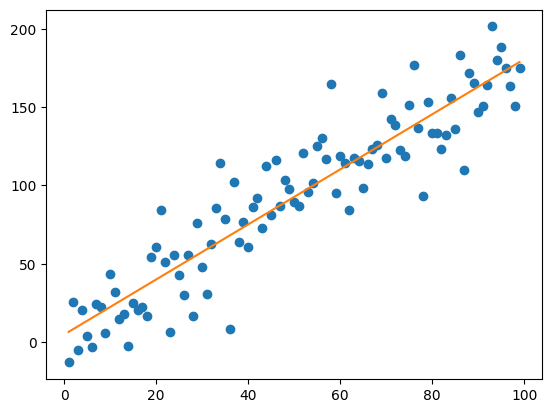

In [ ]:
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

##Zadanie 2

###Obliczanie korelacji

In [ ]:
import pandas as pd
from math import sqrt

In [ ]:
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',')
korelacje = df.corr(method='pearson')

In [ ]:
print(korelacje)

         x        y
x  1.00000  0.92421
y  0.92421  1.00000


###Obliczanie istotności statystycznej

In [ ]:
from scipy.stats import t
from math import sqrt

In [ ]:
n = df.shape[0]

dolna_wk = t(n-1).ppf(.025)
gorna_wk = t(n-1).ppf(.975)

In [ ]:
r = korelacje ['y']['x']

wartosc_testowa = r / sqrt((1- r**2) / (n - 2))

In [ ]:
print(f'WARTOŚĆ TESTOWA: {wartosc_testowa}')
print(f'ZAKRES KRYTYCZNY: {dolna_wk} - {gorna_wk}')

WARTOŚĆ TESTOWA: 23.835515323677328
ZAKRES KRYTYCZNY: -1.9844674544266925 - 1.984467454426692


In [ ]:
if wartosc_testowa < dolna_wk or wartosc_testowa > gorna_wk:
  print(f'KORELACJA POTWIERDZONA')
else:
  print('KORELACJA ODRZUCONA')

KORELACJA POTWIERDZONA


In [ ]:
if wartosc_testowa > 0:
  wartosc_p = 1.0 - t(n-1).cdf(wartosc_testowa)
else:
  wartosc_p = t(n-1).cdf(wartosc_testowa)

In [ ]:
wartosc_p = wartosc_p * 2
print(f'WARTOŚĆ P: {wartosc_p}')

WARTOŚĆ P: 0.0


###Zadanie 3

In [ ]:
import pandas as pd
from scipy.stats import t
from math import sqrt

punkty = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',').itertuples())

n = len(punkty)

m = 1.75919315
b = 4.69359655

x_0 = 50
x_srednia = sum(p.x for p in punkty) / n

wartosc_t = t(n-2).ppf(.975)

blad_standardowy = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in punkty) / (n-2))

margines_bledu = wartosc_t * blad_standardowy * sqrt(1 + (1 / n) + (n * (x_0 - x_srednia) ** 2) / (n * sum(p.x**2 for p in punkty) - sum(p.x for p in punkty)**2))

przewidywane_y = m*x_0 + b

print(przewidywane_y - margines_bledu, przewidywane_y + margines_bledu)

50.792086501055955 134.51442159894404


###Zadanie 4

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
wyniki = cross_val_score(model, X, Y, cv=kfold)
print(wyniki)
print('MSE: średnia=%.3f (odch. standardowe-%.3f)' % (wyniki.mean(), wyniki.std()))

[0.86119665 0.78237719 0.85733887]
MSE: średnia=0.834 (odch. standardowe-0.036)
